<a href="https://colab.research.google.com/github/sandeep-sm/openpose/blob/master/Sayam_intern_caffe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
my_dict = {"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}

In [101]:
POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
MODEL_URL="http://posefs1.perception.cs.cmu.edu/OpenPose/models/"
POSE_FOLDER="pose/"
MPI_FOLDER="pose/mpi/"
MPI_MODEL="pose/mpi/pose_iter_160000.caffemodel"
!wget -c "http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel" --directory-prefix="pose/mpi/"

--2022-05-24 11:59:50--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.220.57
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.220.57|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [18]:
!git clone https://github.com/sandeep-sm/openpose.git


Cloning into 'openpose'...
remote: Enumerating objects: 16059, done.
remote: Total 16059 (delta 0), reused 0 (delta 0), pack-reused 16059
Receiving objects: 100% (16059/16059), 84.42 MiB | 29.02 MiB/s, done.
Resolving deltas: 100% (11256/11256), done.


In [ ]:
%cd /content/openpose/models 
!bash getModels.sh

In [28]:
# !pip install gdown
!gdown https://drive.google.com/drive/u/0/folders/1UJsEwk5gVmhx_MUCm1___pZPpSRVOHdz --folder

Retrieving folder list
Processing file 1ajOAiKuqrNyCyGO7UtV_tSr7j_rwsjPP q1.png
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1ajOAiKuqrNyCyGO7UtV_tSr7j_rwsjPP
To: /content/openpose/models/Sayamdeepa/q1.png
100% 400k/400k [00:00<00:00, 112MB/s]
Download completed


In [53]:

# Specify the paths for the 2 files
protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose/mpi/pose_iter_160000.caffemodel"

# Read the network into Memory
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


In [97]:
# Read image
inpframe = cv2.imread("Sayamdeepa/q1.png")
inpframe.shape

(658, 319, 3)

In [98]:
# Specify the input image dimensions
inWidth = inpframe.shape[1]
inHeight = inpframe.shape[0]

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(
    inpframe, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
  
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

print(inpBlob.max())
print(inpBlob.min())
# cv2_imshow(inpBlob[0,0,:,:]*255)

1.0
0.0


In [99]:
output = net.forward()


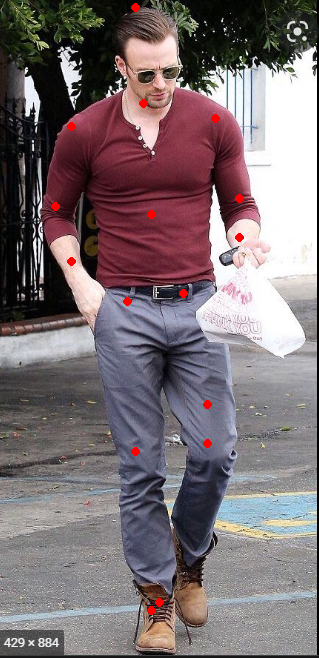

In [119]:
frame = inpframe.copy()
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
threshold = 0.1
for i in range(0,16):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
  
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
  
    # Scale the point to fit on the original image
    x = (inWidth * point[0]) / W
    y = (inHeight * point[1]) / H
    if prob > threshold:
        cv2.circle(frame, (int(x), int(y)), 4, (0, 0, 255),
                   thickness=-1, lineType=cv2.FILLED)
        #cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)
  
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else:
        points.append(None)

cv2_imshow(frame)

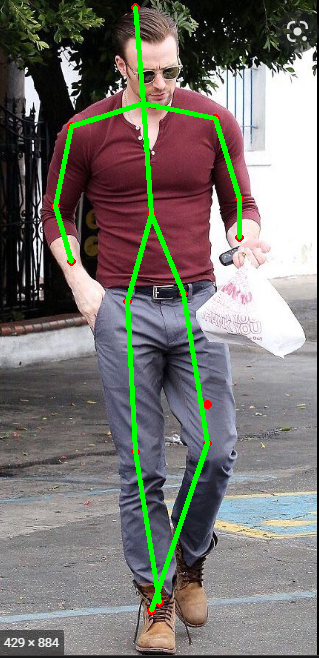

In [122]:
frameCopy = frame.copy()
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[my_dict[partA]] and points[my_dict[partB]]:
        cv2.line(frameCopy, points[my_dict[partA]], points[my_dict[partB]], (0, 255, 0), 3)

cv2_imshow(frameCopy)



#  ***Task 1.2***



*   I used an open-source repository named "OpenPose" as my pose predictor. It is pretrained on two datasets MPII and COCO. I specifically used the MPII trained model. It is a caffe framework model and requires a prototext file and a weights files to load the network.

*   I used cv2.dnn library for my pre-processing. The output of the network provides various primary and secondary key-points. As mentioned in the dataset I used the first 16 primary keypoints to mark on the image, these represent the major landmarks of the human body. 

*   I thresholded the probability of each point to be more than atleast 0.1 for it to be considered as a landmark. After the thresholding each point is marked using cv2.circle(). Using the correct pair information I have also connected the pairs using cv2.line().









In [124]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [132]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.5)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [126]:
# mark the required landmarks
# Nose
# Left shoulder 
# Right shoulder
# Right elbow
# Left elbow
# Right knee
# Left knee 
# Right ankle
# Left ankle

# my_dict = {"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
# "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
# "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
# "Background": 15}


required_landmarks = [0,5,2,3,6,9,12,10,13]


In [139]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    # Specify the input image dimensions
    inWidth = frame.shape[1]
    inHeight = frame.shape[0]

    # resize to get faster processing
    resize_ratio = 5
    dim = (inWidth//resize_ratio, inHeight//resize_ratio)

    frame_resized = cv2.resize(frame, dim, interpolation = cv2.INTER_CUBIC)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480//resize_ratio,640//resize_ratio,4], dtype=np.uint8)

    # Prepare the frame to be fed to the network
    inpBlob = cv2.dnn.blobFromImage(
        frame, 1.0 / 255, (inWidth//resize_ratio, inHeight//resize_ratio), (0, 0, 0), swapRB=False, crop=False)
      
    # Set the prepared object as the input blob of the network
    net.setInput(inpBlob)

    # call the pose detector on video frame
    output = net.forward()

    # mark the detected landmarks on the empty bbox 
    frame = bbox_array.copy()
    H = output.shape[2]
    W = output.shape[3]
    # Empty list to store the detected keypoints
    points = []
    threshold = 0.2              
    for i in required_landmarks:
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
      
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
      
        # Scale the point to fit on the original image
        x = (dim[0] * point[0]) / W
        y = (dim[1] * point[1]) / H
        if prob > threshold:
            cv2.circle(frame, (int(x), int(y)), 1, (0, 0, 255),
                      thickness=-1, lineType=cv2.FILLED)
            #cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)
      
            # Add the point to the list if the probability is greater than the threshold
            points.append((int(x), int(y)))
        else:
            points.append(None)

    bbox_array = frame.copy()    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    
    bbox_array.shape
    # resize bbox to fit original shape
    # bbox_array = cv2.resize(bbox_array, dim*resize_ratio, interpolation = cv2.INTER_AREA)
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>